# M4 Assignment - Davis Zakary

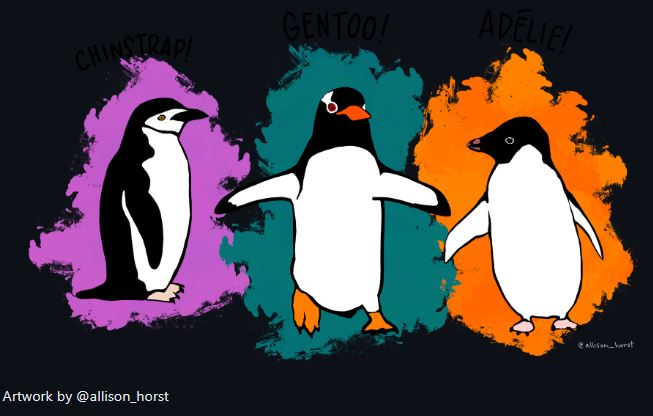

## Overview
### Stage.1=> Dataset Inspection and Preprocessing
```
- 1.1 Load the Palmer Penguins dataset into a suitable data structure.  
- 1.2 Address missing values via imputation or removal.  
- 1.3 Assess descriptive statistics and visualize the distributions of feature and target variables.  
- 1.4 Assess the correlations between feature and target variables.  
```

### Stage.2=> Feature Selection and Engineering
```
- 2.1 Identify features to the prediction of penguin species.  
- 2.2 Select the most informative features using feature selection techniques
 like univariate analysis, feature importance ranking, and dimensionality reduction.  
- 2.3 Consider engineering new features by combining or transforming existing features.  
- - Huh? It's as simple as multiplying one variable with another in hopes of improving predictive power.  
```

### Stage.3=> (Pick 4) Machine learning and Hyperparameter Tuning
```
- 3. Fine-tune the hyperparameters to optimize their performance.  
-  Use techniques like grid or random search to explore different  
  combinations of hyperparameters and their configuration.  
- 3 Validate tuned models on testing data sets.  
```

- `Stage.3 NEW Learning goal`
- `3.3.note=>` the objective is to take extra time and `read` the  
scikit-learn algorithm homepage to assess features and parameters.  
- Attempt to tune a couple parameters and add a bullet of what you  
did in the executive summary.  


### Part 4=> Model Interpretation and Validation
```
- 4.1 Interpret the trained models to understand the relationship  
=> between their features and the predicted penguin species.  
- 4.2 Ensure robustness and reliability and validate with items like    
=>  k-fold, cross-validation, and holdout to name a few.  
```

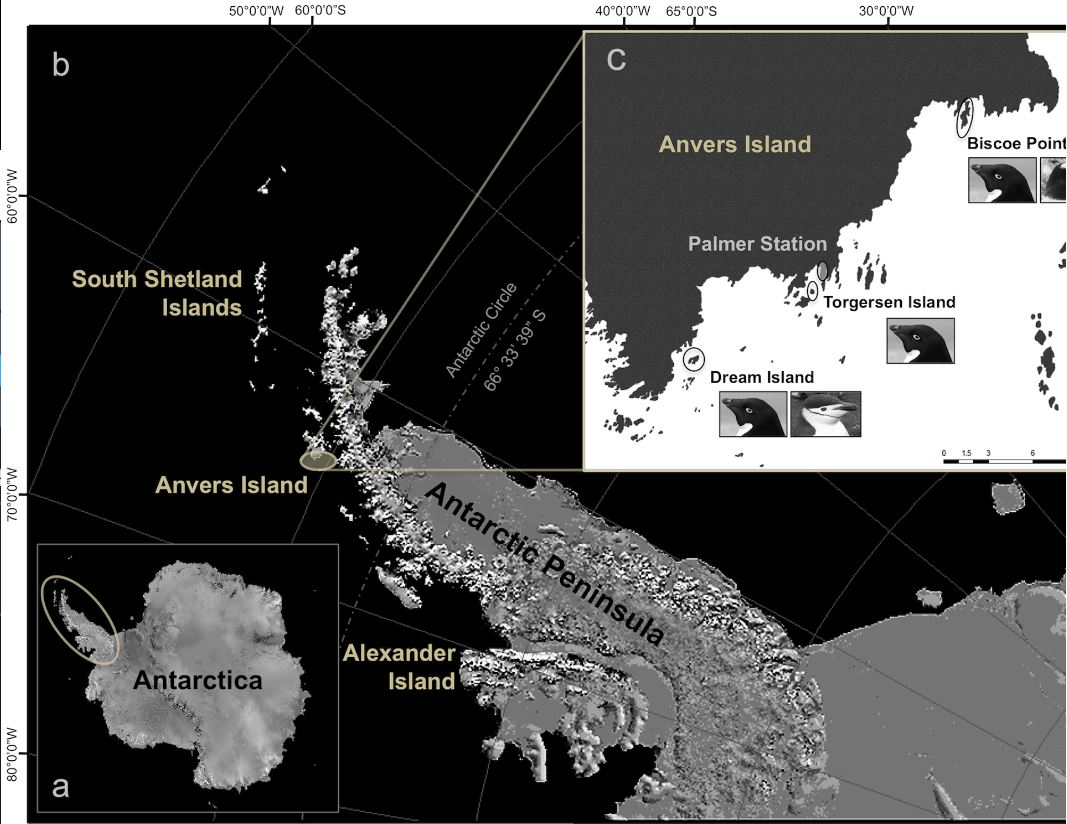  

References  
Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081  
- [link](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081)  

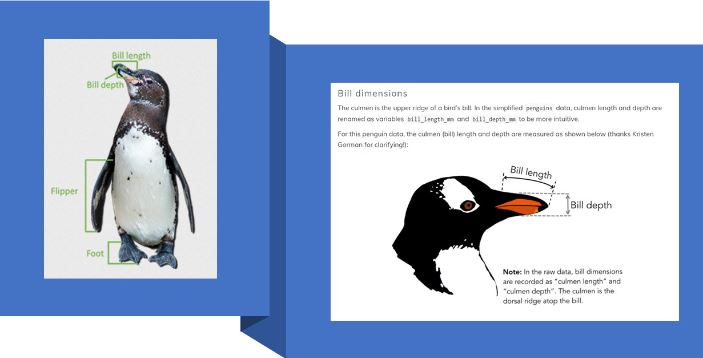


## Executive Summary
Hello there

## Stage 1: Dataset Inspection and Preprocessing

### Tasks and outcomes

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

In [11]:
data_url = "https://raw.githubusercontent.com/mcnakhaee/palmerpenguins/refs/heads/master/palmerpenguins/data/penguins.csv"
df_raw = pd.read_csv(data_url)
print(df_raw.info())
print(df_raw.describe())
print(df_raw.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  270

In [12]:
df = pd.DataFrame(df_raw.dropna())
df.drop(columns=['island', 'year'], inplace=True)
print(df['species'].value_counts())
print(df['sex'].value_counts())

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64
sex
male      168
female    165
Name: count, dtype: int64


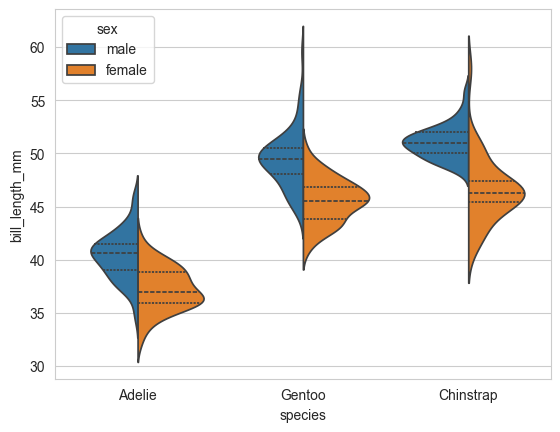

In [13]:
sns.violinplot(
    data=df,
    x='species',
    y='bill_length_mm',
    hue='sex',
    split=True,
    inner='quart'
)
plt.show()

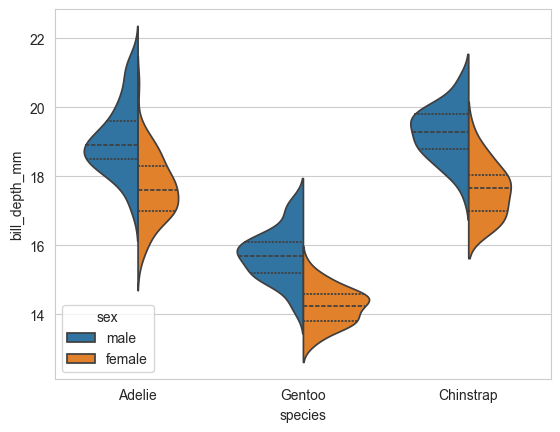

In [14]:
sns.violinplot(
    data=df,
    x='species',
    y='bill_depth_mm',
    hue='sex',
    split=True,
    inner='quart'
)
plt.show()

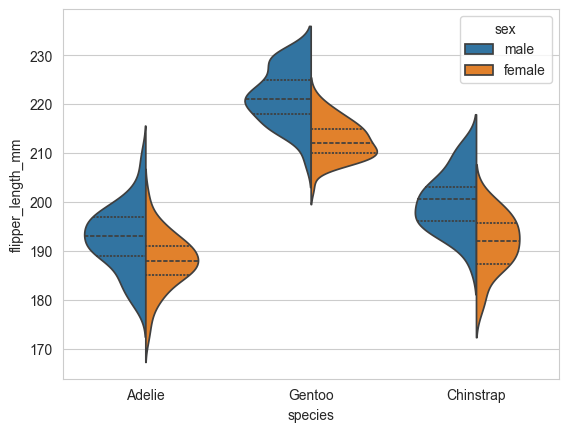

In [15]:
sns.violinplot(
    data=df,
    x='species',
    y='flipper_length_mm',
    hue='sex',
    split=True,
    inner='quart'
)
plt.show()

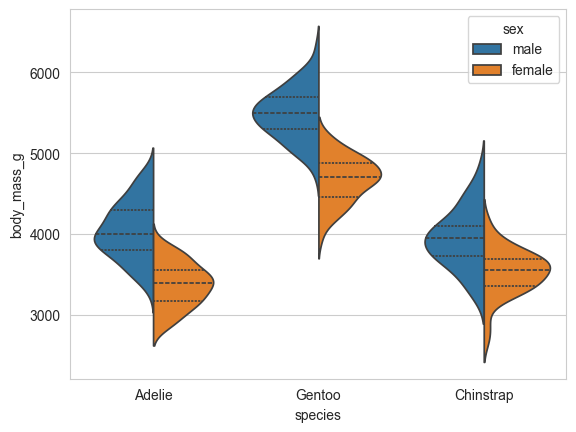

In [16]:
sns.violinplot(
    data=df,
    x='species',
    y='body_mass_g',
    hue='sex',
    split=True,
    inner='quart'
)
plt.show()

## Stage 2: Feature Selection and Engineering

In [17]:
df['sex'] = df['sex'] == 'male'
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,True
1,Adelie,39.5,17.4,186.0,3800.0,False
2,Adelie,40.3,18.0,195.0,3250.0,False
4,Adelie,36.7,19.3,193.0,3450.0,False
5,Adelie,39.3,20.6,190.0,3650.0,True


In [18]:
norm_cols = [
    'bill_length_mm',
    'bill_depth_mm',
    'body_mass_g',
    'flipper_length_mm',
]
bill_cross_section = df['bill_length_mm'] * df['bill_depth_mm']
df[norm_cols] = (df[norm_cols] - df[norm_cols].mean()) / df[norm_cols].std()
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,-0.894695,0.779559,-1.424608,-0.567621,True
1,Adelie,-0.821552,0.119404,-1.067867,-0.505525,False
2,Adelie,-0.675264,0.424091,-0.425733,-1.188572,False
4,Adelie,-1.333559,1.084246,-0.568429,-0.940192,False
5,Adelie,-0.858123,1.744400,-0.782474,-0.691811,True


In [19]:
correlation = df.corr(numeric_only=True)
print(correlation)

                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   
sex                      0.344078       0.372673           0.255169   

                   body_mass_g       sex  
bill_length_mm        0.589451  0.344078  
bill_depth_mm        -0.472016  0.372673  
flipper_length_mm     0.872979  0.255169  
body_mass_g           1.000000  0.424987  
sex                   0.424987  1.000000  


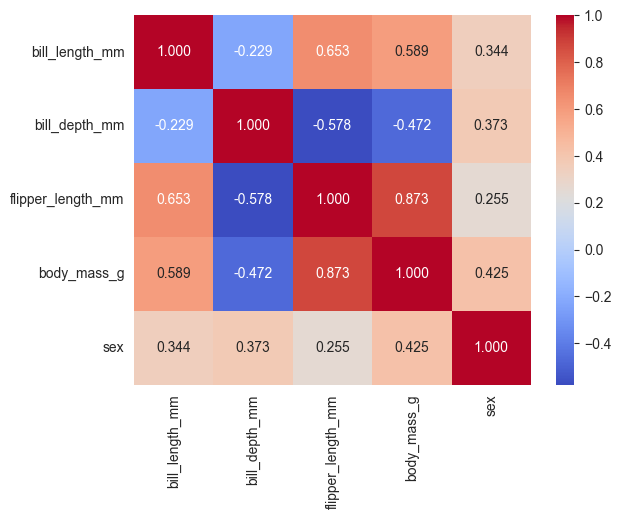

In [20]:
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.3f')
plt.show()

In [21]:
df_no_species = df.drop(columns='species')
pca_obj = PCA(n_components=3)
pca_data = pca_obj.fit_transform(df_no_species)
print(pca_obj.explained_variance_ratio_)
print(pca_obj.explained_variance_)
print(sum(pca_obj.explained_variance_ratio_))

[0.64945832 0.20998786 0.09659225 0.02719969]
[2.7606737  0.89260225 0.41058785 0.11561861]
0.983238123291581


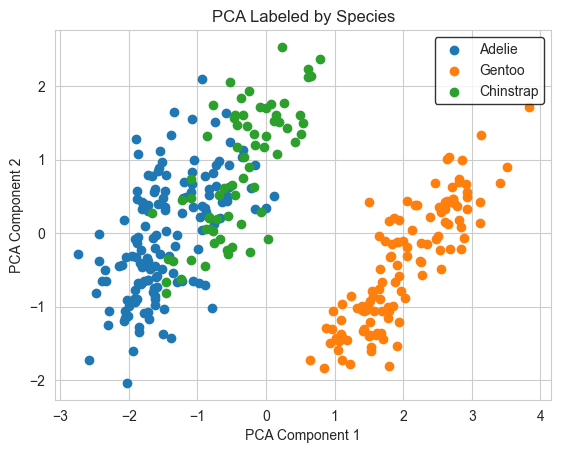

In [22]:
species = df['species'].unique()
for name in species:
    idx = (df['species'] == name).to_numpy()
    plt.scatter(pca_data[idx, 0], pca_data[idx, 1], label=name)
plt.title('PCA Labeled by Species')
plt.legend(edgecolor='black')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [29]:
df_no_species['bill_cross_section'] = (bill_cross_section - bill_cross_section.mean()) / bill_cross_section.std()
pca_obj = PCA(n_components=3)
pca_data = pca_obj.fit_transform(df_no_species)
print(pca_obj.explained_variance_ratio_)
print(pca_obj.explained_variance_)
print(sum(pca_obj.explained_variance_ratio_))

[0.53179613 0.3470246  0.08481121]
[2.7923193  1.8221334  0.44532099]
0.9636319385039464


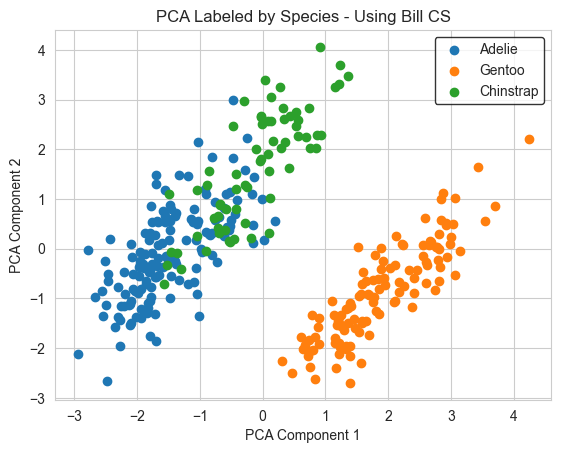

In [30]:
species = df['species'].unique()
for name in species:
    idx = (df['species'] == name).to_numpy()
    plt.scatter(pca_data[idx, 0], pca_data[idx, 1], label=name)
plt.title('PCA Labeled by Species - Using Bill CS')
plt.legend(edgecolor='black')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

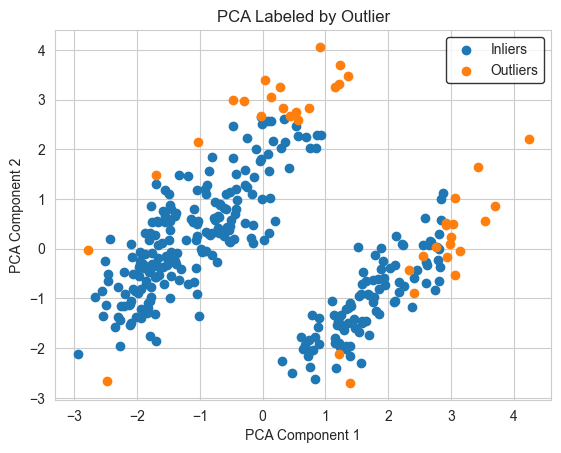

In [46]:
arr = df_no_species.to_numpy()
outliers = np.any((arr > 2) | (arr < -2), axis=1)

plt.scatter(pca_data[~outliers, 0], pca_data[~outliers, 1], label='Inliers')
plt.scatter(pca_data[outliers, 0], pca_data[outliers, 1], label='Outliers')
plt.legend(edgecolor='black')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Labeled by Outlier')
plt.show()

In [49]:
species = {'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}
x = arr[~outliers, :]
y = df['species'].map(species).to_numpy()[~outliers]
print(y.shape, x.shape)

(294,) (294, 6)


In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(np.unique_counts(y_train))

(235, 6) (235,)
(59, 6) (59,)
UniqueCountsResult(values=array([0, 1, 2]), counts=array([113,  80,  42]))


### Stage.3 Machine learning and Hyperparameter Tuning


`Alogithm homepage with hyperparameters` Pick Four to Use:
- Perceptron
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

- Linear Regression
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- Logistic Regression
- https://scikit-learn.org/stable/modules/generated/sklearnlinear_model.LogisticRegression.html#sklearn-linear-model-logisticregression

- Naïve Bayes
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn-naive-bayes-gaussiannb

- k-Nearest Neighbor
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

- Decision Tree
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn-tree-decisiontreeclassifier

- Random Forest
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn-ensemble-randomforestclassifier

- Support Vector Machine
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn-svm-svc

- Neural Networks/ Convolutional Neural Networks
- https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-network-models-supervised



In [88]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, log_loss, make_scorer
from sklearn.model_selection import GridSearchCV

#### Logistic Regression
Here, I train a multi-class logistic regression model.
Setting `class_weight` to `balanced` helps mitigate the impact of class imbalance - specifically concerning how we have less chinstrap penguins.

In-depth evaluation will happen in the next section. However, for a quick assessment of model performance we can look at *balanced accuracy* and *cross entropy*.
Balanced accuracy modified the standard accuracy formula to assign equal importance to all classes.

Cross entropy, also called log loss, incorporates the confidence of predictions.
Thinking about the generalization of our classifier, there is a difference between being highly confident in a wrong prediction and being only marginally confident.
Ideally, our model should be unsure about every data point it gets wrong. Essentially a "random guess."
But if it is very confident in its mistake, this could be an issue.
Unlike accuracy, a smaller cross entropy score is better.

I also include a confusion matrix to help visualize which mistakes the model is making.
It appears - unsurprisingly - that it is confusing some of the chinstrap penguins with the Adelie species.
On the PCA scatterplot, we can see that both of these classes exist near each other in feature space, while the third species is much easier to seperate.

In [61]:
model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)

ba = balanced_accuracy_score(y_test, y_pred)
cross_entropy = log_loss(y_test, y_pred_prob)
print(f'Balanced Accuracy: {ba:.4f}')
print(f'Cross Entropy: {cross_entropy:.4f}')
print(confusion_matrix(y_test, y_pred))

Balanced Accuracy: 0.9762
Cross Entropy: 0.0819
[[26  0  2]
 [ 0 20  0]
 [ 0  0 11]]


#### Naive Bayes

In [75]:
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)

ba = balanced_accuracy_score(y_test, y_pred)
cross_entropy = log_loss(y_test, y_pred_prob)
print(f'Balanced Accuracy: {ba:.4f}')
print(f'Cross Entropy: {cross_entropy:.4f}')
print(confusion_matrix(y_test, y_pred))

Balanced Accuracy: 0.9762
Cross Entropy: 0.1223
[[26  0  2]
 [ 0 20  0]
 [ 0  0 11]]


#### Support Vector Machine (Classifier)
Here is our first model that has any hyperparameters to manipulate.
*(Logistic regression had l1 vs l2 loss, but l1 is incompatible with the multi-class solver)*
I try two different kernels, which determine the feature space transformation used by the SVM algorithm.

Linear gives better a slightly better accuracy, reducing the incorrect classified points from 2->1.
However, this comes at a small increase in cross-entropy loss compared to the radial-basis-function.
This small of a difference could be due to chance. We will see if the difference holds during validation.

In [118]:
model = SVC(
    class_weight='balanced',
    probability=True,
    random_state=42
)
param_grid = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'C': [1, 2, 3, 0.5],
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_log_loss',
    n_jobs=3,
)
grid_search.fit(x_train, y_train)

print('Best parameters: ', grid_search.best_params_)
print(f'Best Score: ', grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_prob = best_model.predict_proba(x_test)
y_pred = best_model.predict(x_test)

ba = balanced_accuracy_score(y_test, y_pred)
cross_entropy = log_loss(y_test, y_pred_prob)
print(f'Balanced Accuracy: {ba:.4f}')
print(f'Cross Entropy: {cross_entropy:.4f}')
print(confusion_matrix(y_test, y_pred))

Best parameters:  {'C': 1, 'kernel': 'rbf'}
Best Score:  -0.053090212120384436
Balanced Accuracy: 0.9762
Cross Entropy: 0.0573
[[26  0  2]
 [ 0 20  0]
 [ 0  0 11]]


#### Random Forest
Since random forest actually has a few numerical hyperparameters we can tune using a search strategy, I used an exhaustive grid search to select the model with the lowest cross-entropy.

For a "real" model that takes many hours to train I might attempt to guide the search using a more intelligent method that is not fully-exhaustive, such as hyperband.
This could be combined with Asynchronous Successive Halving (ASHA) to early stop under-performing trials and free up resources.

In [120]:
model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
)
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 3, 4, 5],
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_log_loss',
    n_jobs=3,
)
grid_search.fit(x_train, y_train)

print('Best parameters: ', grid_search.best_params_)
print(f'Best Score: ', grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_prob = best_model.predict_proba(x_test)
y_pred = best_model.predict(x_test)

ba = balanced_accuracy_score(y_test, y_pred)
cross_entropy = log_loss(y_test, y_pred_prob)
print(f'Balanced Accuracy: {ba:.4f}')
print(f'Cross Entropy: {cross_entropy:.4f}')
print(confusion_matrix(y_test, y_pred))

Best parameters:  {'min_samples_split': 2, 'n_estimators': 20}
Best Score:  -0.09320696649709063
Balanced Accuracy: 0.9881
Cross Entropy: 0.0750
[[27  0  1]
 [ 0 20  0]
 [ 0  0 11]]


## Part 4: Model Interpretation and Validation

In [93]:
from sklearn.model_selection import StratifiedKFold

#### Logistic Regression

In [108]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=38)
ba = []
ce = []
models = []
for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train)):
    x1 = x_train[train_index]
    x2 = x_train[test_index]
    y1 = y_train[train_index]
    y2 = y_train[test_index]
    model = LogisticRegression(class_weight='balanced')
    model.fit(x1, y1)
    models.append(model)
    y_pred = model.predict(x2)
    y_pred_prob = model.predict_proba(x2)
    ba.append(balanced_accuracy_score(y2, y_pred))
    ce.append(log_loss(y2, y_pred_prob))

print(f'Avg Balanced Accuracy: {sum(ba) / 5:.4f}')
print(f'Avg Cross Entropy: {sum(ce) / 5:.4f}')

print('\nHoldout: ')
best_model = models[ce.index(min(ce))]
y_pred = best_model.predict(x_test)
y_pred_prob = best_model.predict_proba(x_test)
ba = balanced_accuracy_score(y_test, y_pred)
cross_entropy = log_loss(y_test, y_pred_prob)
print(f'Balanced Accuracy: {ba:.4f}')
print(f'Cross Entropy: {cross_entropy:.4f}')
print(confusion_matrix(y_test, y_pred))

Avg Balanced Accuracy: 0.9867
Avg Cross Entropy: 0.0560

Holdout: 
Balanced Accuracy: 0.9762
Cross Entropy: 0.0878
[[26  0  2]
 [ 0 20  0]
 [ 0  0 11]]


#### Naive Bayes

In [110]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=38)
ba = []
ce = []
models = []
for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train)):
    x1 = x_train[train_index]
    x2 = x_train[test_index]
    y1 = y_train[train_index]
    y2 = y_train[test_index]
    model = GaussianNB()
    model.fit(x1, y1)
    models.append(model)
    y_pred = model.predict(x2)
    y_pred_prob = model.predict_proba(x2)
    ba.append(balanced_accuracy_score(y2, y_pred))
    ce.append(log_loss(y2, y_pred_prob))

print(f'Avg Balanced Accuracy: {sum(ba) / 5:.4f}')
print(f'Avg Cross Entropy: {sum(ce) / 5:.4f}')

print('\nHoldout: ')
best_model = models[ce.index(min(ce))]
y_pred = best_model.predict(x_test)
y_pred_prob = best_model.predict_proba(x_test)
ba = balanced_accuracy_score(y_test, y_pred)
cross_entropy = log_loss(y_test, y_pred_prob)
print(f'Balanced Accuracy: {ba:.4f}')
print(f'Cross Entropy: {cross_entropy:.4f}')
print(confusion_matrix(y_test, y_pred))

Avg Balanced Accuracy: 0.9514
Avg Cross Entropy: 0.1487

Holdout: 
Balanced Accuracy: 0.9762
Cross Entropy: 0.1109
[[26  0  2]
 [ 0 20  0]
 [ 0  0 11]]


#### SVM

In [121]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=38)
ba = []
ce = []
models = []
for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train)):
    x1 = x_train[train_index]
    x2 = x_train[test_index]
    y1 = y_train[train_index]
    y2 = y_train[test_index]
    model = SVC(
        probability=True,
        class_weight='balanced',
        kernel='rbf',
        C=1,
        random_state=42,
    )
    model.fit(x1, y1)
    models.append(model)
    y_pred = model.predict(x2)
    y_pred_prob = model.predict_proba(x2)
    ba.append(balanced_accuracy_score(y2, y_pred))
    ce.append(log_loss(y2, y_pred_prob))

print(f'Avg Balanced Accuracy: {sum(ba) / 5:.4f}')
print(f'Avg Cross Entropy: {sum(ce) / 5:.4f}')

print('\nHoldout: ')
best_model = models[ce.index(min(ce))]
y_pred = best_model.predict(x_test)
y_pred_prob = best_model.predict_proba(x_test)
ba = balanced_accuracy_score(y_test, y_pred)
cross_entropy = log_loss(y_test, y_pred_prob)
print(f'Balanced Accuracy: {ba:.4f}')
print(f'Cross Entropy: {cross_entropy:.4f}')
print(confusion_matrix(y_test, y_pred))

Avg Balanced Accuracy: 0.9756
Avg Cross Entropy: 0.0583

Holdout: 
Balanced Accuracy: 0.9762
Cross Entropy: 0.0571
[[26  0  2]
 [ 0 20  0]
 [ 0  0 11]]


In [122]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=38)
ba = []
ce = []
models = []
for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train)):
    x1 = x_train[train_index]
    x2 = x_train[test_index]
    y1 = y_train[train_index]
    y2 = y_train[test_index]
    model = RandomForestClassifier(
        class_weight='balanced',
        n_estimators=20,
        min_samples_split=2,
        random_state=42,
    )
    model.fit(x1, y1)
    models.append(model)
    y_pred = model.predict(x2)
    y_pred_prob = model.predict_proba(x2)
    ba.append(balanced_accuracy_score(y2, y_pred))
    ce.append(log_loss(y2, y_pred_prob))

print(f'Avg Balanced Accuracy: {sum(ba) / 5:.4f}')
print(f'Avg Cross Entropy: {sum(ce) / 5:.4f}')

print('\nHoldout: ')
best_model = models[ce.index(min(ce))]
y_pred = best_model.predict(x_test)
y_pred_prob = best_model.predict_proba(x_test)
ba = balanced_accuracy_score(y_test, y_pred)
cross_entropy = log_loss(y_test, y_pred_prob)
print(f'Balanced Accuracy: {ba:.4f}')
print(f'Cross Entropy: {cross_entropy:.4f}')
print(confusion_matrix(y_test, y_pred))

Avg Balanced Accuracy: 0.9839
Avg Cross Entropy: 0.0810

Holdout: 
Balanced Accuracy: 0.9881
Cross Entropy: 0.0952
[[27  0  1]
 [ 0 20  0]
 [ 0  0 11]]
